In [1]:
import os
import numpy as np
import aocd
from aocd.models import Puzzle
from aocd import submit
import matplotlib.pyplot as plt
%matplotlib inline
%pdb

Automatic pdb calling has been turned ON


In [2]:
current_day = 20
current_year = 2021
puzzle = Puzzle(year=current_year, day=current_day)
puzzle

<Puzzle(2021, 20) at 0x7fa67cacb220 - Trench Map>

# Part 1

In [3]:
algo, data = puzzle.input_data.split('\n\n')
data = data.splitlines()
data = np.array([[char=='#' for char in line] for line in data], dtype='int')
algo = np.array([char=='#' for char in algo], dtype='int')
print(data.shape, algo.shape)
# plt.imshow(data)

(100, 100) (512,)


In [4]:
def process(input_data, pad_value=0):
    kernel = (2**(np.arange(9)[::-1].reshape((3,3)))).astype('int')
    K = 3
    rows, cols = input_data.shape
    input_padded = np.pad(input_data, (K, K), constant_values=pad_value)
    output = np.zeros((rows+2*(K-1),cols+2*(K-1)), dtype='int')
    for row in range(output.shape[0]):
        for col in range(output.shape[1]):
            val = np.sum(kernel * input_padded[row:row+K,col:col+K])
            assert 0<=val<512
            # print(val)
            output[row,col] = algo[val]
    return output

5526


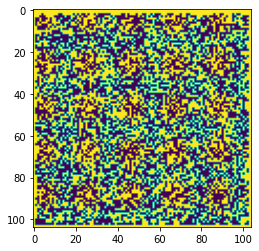

In [5]:
output = process(data)
print(np.count_nonzero(output))
plt.imshow(output)

5249


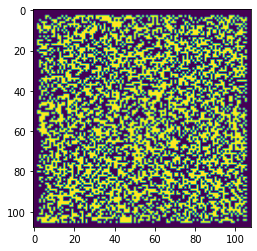

In [6]:
output2 = process(output, pad_value=1)
print(np.count_nonzero(output2))
plt.imshow(output2)

In [7]:
puzzle.answer_a = np.count_nonzero(output2)

# Part 2

15714


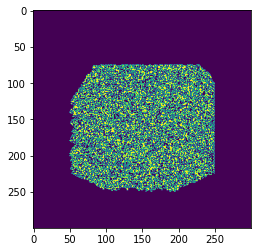

In [8]:
for trial in range(25):
    output = process(data, pad_value=0)
    data = process(output, pad_value=1)
print(np.count_nonzero(data))
plt.imshow(data)

In [9]:
puzzle.answer_b = np.count_nonzero(data)